In [25]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import datetime as dt
import time

In [26]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id')

In [27]:
# nos quedamos con las columnas que nos interesan
df = df[['titulo', 'descripcion', 'fecha', 'precio']]
df.head().sort_values(by = ['fecha'], ascending = False)

,titulo,descripcion,fecha,precio
id,,,,
185997,paseos del sol,bonito departamento en excelentes condiciones ...,2016-06-07 00:00:00,1150000.0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,2015-10-17 00:00:00,1200000.0
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2015-08-23 00:00:00,2273000.0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",2013-06-28 00:00:00,3600000.0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,2012-03-09 00:00:00,650000.0


In [28]:
df.isnull().any()

titulo          True
descripcion     True
fecha          False
precio         False
dtype: bool

In [29]:
df_fecha = df['fecha'].value_counts()
df_fecha

2016-12-03 00:00:00    1416
2016-04-08 00:00:00    1337
2016-12-28 00:00:00    1182
2012-08-17 00:00:00    1168
2016-12-27 00:00:00    1167
2016-12-24 00:00:00    1143
2016-12-13 00:00:00    1128
2016-12-17 00:00:00    1120
2016-12-31 00:00:00    1092
2016-12-10 00:00:00    1055
2016-12-09 00:00:00    1048
2016-12-02 00:00:00    1044
2016-12-06 00:00:00    1033
2012-10-02 00:00:00    1025
2016-12-14 00:00:00    1010
2016-12-21 00:00:00     993
2016-12-12 00:00:00     987
2016-12-07 00:00:00     931
2016-12-20 00:00:00     897
2016-12-16 00:00:00     876
2016-12-23 00:00:00     875
2016-12-25 00:00:00     856
2016-12-30 00:00:00     822
2016-12-04 00:00:00     815
2016-12-22 00:00:00     791
2016-12-08 00:00:00     787
2016-12-18 00:00:00     784
2016-12-05 00:00:00     775
2014-12-05 00:00:00     763
2016-12-26 00:00:00     734
                       ... 
2013-03-29 00:00:00      18
2013-09-29 00:00:00      18
2012-10-06 00:00:00      18
2012-01-21 00:00:00      18
2013-12-21 00:00:00 

In [30]:
fecha = df.fecha.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [31]:
df['fecha'] = fecha

In [32]:
anio = df.fecha.apply(lambda x: x.year)
df['anio'] = anio
hora = df.fecha.apply(lambda x: x.hour)
df['hora'] = hora

In [33]:
hora.value_counts().head()

0     239986
11        11
18         3
Name: fecha, dtype: int64

In [34]:
df.head()

,titulo,descripcion,fecha,precio,anio,hora
id,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2015-08-23,2273000.0,2015,0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",2013-06-28,3600000.0,2013,0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,2015-10-17,1200000.0,2015,0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,2012-03-09,650000.0,2012,0
185997,paseos del sol,bonito departamento en excelentes condiciones ...,2016-06-07,1150000.0,2016,0


In [35]:
anio.value_counts().head()

2016    94038
2015    51470
2014    40572
2013    30386
2012    23534
Name: fecha, dtype: int64

Text(0,0.5,'Anio')

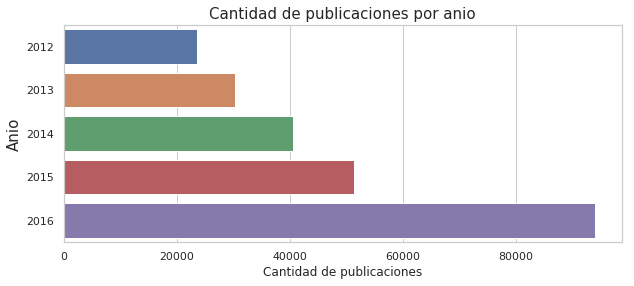

In [36]:
plt.figure(figsize=(10, 4))
gr = sns.barplot(x=df.anio.value_counts().values , y=df.anio.value_counts().index ,  orient='h')
gr.set_title("Cantidad de publicaciones por anio", fontsize=15)
gr.set_xlabel("Cantidad de publicaciones", fontsize=12)
gr.set_ylabel("Anio", fontsize=15)

In [37]:
## veo que palabras son las más usadas en titulo y desc

In [38]:
first_five = df.descripcion.str.split(n=5, expand=True)
first_five.head()

,0,1,2,3,4,5
id,,,,,,
254099,depto.,interior,de,"80.15m2,",consta,"de sala comedor cocina equipada, área de lavad..."
53461,<p>entre,sonora,y,"guerrero,",atr&aacute;s,"del hospital &aacute;ngeles del pedregal, en e..."
247984,descripcion,la,mejor,ubicacion,residencial,"en el oriente de la ciudad urbi versalles, te ..."
209067,casa,en,privada,con,caseta,"de vigilancia casas de dos y tres recamaras, a..."
185997,bonito,departamento,en,excelentes,condiciones,muy buena ubicacion listo para habitar llameno...


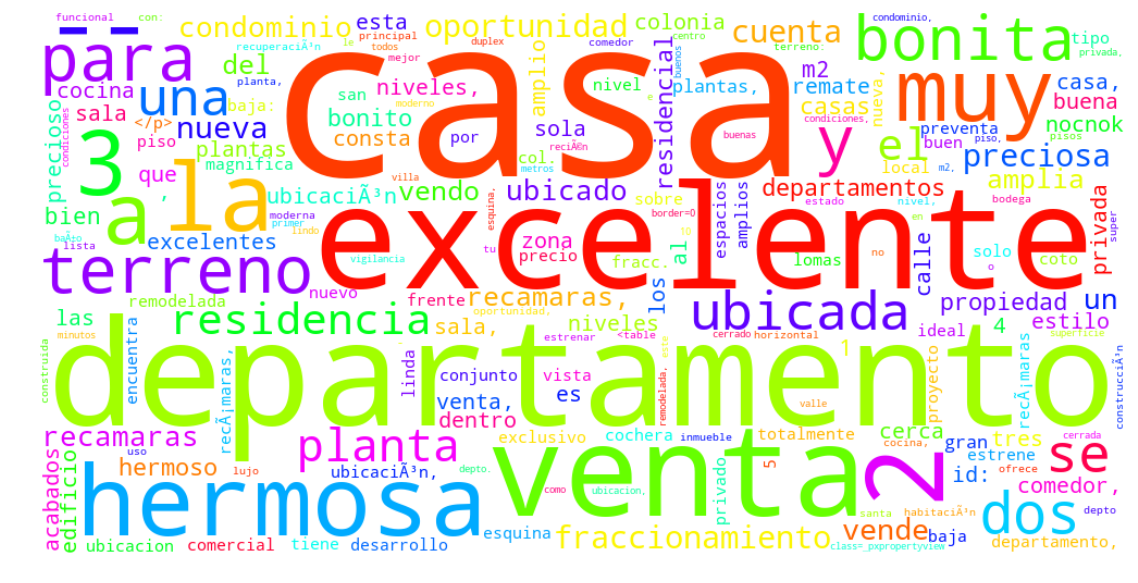

In [39]:
words_df = pd.DataFrame(pd.concat([first_five[0],first_five[1],first_five[2],first_five[3],first_five[4]]))
words_df.columns = ['word']
words_df = words_df[(words_df['word']!='en') & (words_df['word']!='de') & (words_df['word']!='con')]
words_df.word = words_df.word.str.replace('<p>','')
wordcloud= WordCloud(width=1000, height=500, colormap="hsv", background_color='white')
wordcloud.generate_from_frequencies(frequencies=words_df.word.value_counts())

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis('off')
plt.show()

In [46]:
top_3_title = df.titulo.str.split(n=3, expand=True)
top_3_title.head()


,0,1,2,3
id,,,,
254099,depto.,tipo,a-402,None
53461,condominio,horizontal,en,venta
247984,casa,en,venta,urbi 3 recamaras tonala
209067,casa,sola,en,"toluca zinacantepec con credito infonavit,fovi..."
185997,paseos,del,sol,None


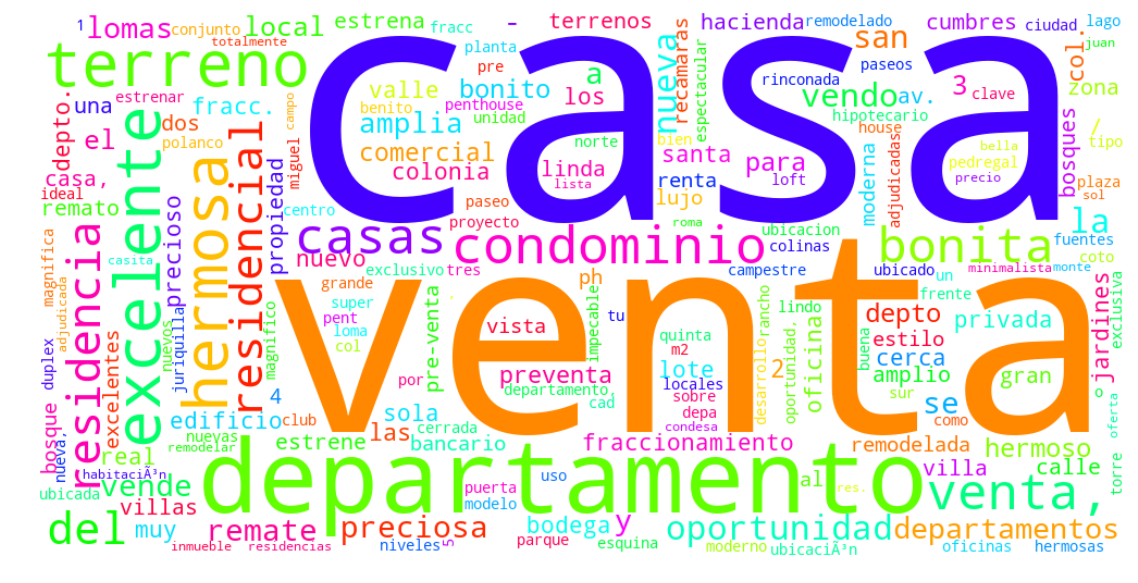

In [47]:

words_df = pd.DataFrame(pd.concat([top_3_title[0],top_3_title[1],top_3_title[2]]))
words_df.columns = ['word']
words_df = words_df[(words_df['word']!='en') & (words_df['word']!='de') & (words_df['word']!='con')]
words_df.word = words_df.word.str.replace('<p>','')
wordcloud= WordCloud(width=1000, height=500, colormap="hsv", background_color='white')
wordcloud.generate_from_frequencies(frequencies=words_df.word.value_counts())

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis('off')
plt.show()